In [ ]:
!pip install googletrans==4.0.0-rc.1

In [1]:
from googletrans import Translator
import pandas as pd 
import os
from tqdm import tqdm

'''
AllReviewCorpus_Moon
해당 파일은 깃허브 파일 기준 csv 파일입니다.
'''

local=os.getcwd()


ppd=pd.read_csv(local+'//AllReviewCorpus_Moon.csv')
tran = Translator()
#translator.translate('안녕하세요.')
# <Translated src=ko dest=en text=Good evening. pronunciation=Good evening.>

def Tran_KRtoEN(txt,c,y):
    '''
        txt : pandas.core.series.Series 컬럼 인수값
        y   : 원하는 컬럼 갯수 

        반환값 : list형식
    '''
    krenStr=[]
    for i in tqdm(range(c,y)):
        try:
            kkr=tran.translate(txt[i], dest='en')
            #print(kkr.text)
            krenStr.append(kkr.text)
        except IndexError:
            print(i)
            print(f'{i} 번째행 에러')
            pass
        except:
            print(i)
            print(f'그외 {i} 번째행 에러')
            pass
            
    return krenStr

#print(ppd['댓글'][73330]) #73330         

#nnum=[60000,50000,40000,30000,20000,10000]


listENKR=Tran_KRtoEN(ppd['댓글'],20000,30000)

df=pd.DataFrame(listENKR)

df.to_csv(local+'//bomtoon_KRtoEN_30000.csv')

print('10000 ~ {) 개 완료}'.format(30000))




  1%|▏         | 125/10000 [02:41<8:15:39,  3.01s/it]

20124
그외 20124 번째행 에러


  9%|▉         | 910/10000 [19:51<7:13:44,  2.86s/it]

20909
그외 20909 번째행 에러


 26%|██▋       | 2637/10000 [57:32<4:58:35,  2.43s/it]

22636
그외 22636 번째행 에러


 51%|█████▏    | 5129/10000 [1:50:15<3:47:14,  2.80s/it]

25128
그외 25128 번째행 에러


 63%|██████▎   | 6277/10000 [2:15:18<1:03:13,  1.02s/it]

26276
26276 번째행 에러


 94%|█████████▍| 9404/10000 [3:19:41<32:07,  3.23s/it]  

29403
그외 29403 번째행 에러


100%|██████████| 10000/10000 [3:31:17<00:00,  1.27s/it]


KeyError: ') 개 완료'

In [39]:
import re
import os
from tqdm import tqdm



local=os.getcwd()

kren=pd.read_csv(local+'//csv//bomtoon_KRtoEN_50000_60000.csv')
#영문 번역 후 미번역 한글출력으로 인한 제거 작업(특수문자/특수한글  포함)
#

def krClear(txt):
    enpass=[]
    for i in (range(len(txt))):
        enResult=re.sub(r"[^a-zA-Z\s]", "", kren['0'][i]) # 영문자 + 공백만 남기기
        enResult_1= re.sub(r"[ㄱ-ㅣ가-힣]", "", enResult) # 추가로 한글 제거
        enResult_2= re.sub(r"[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’]", "", enResult_1) # 추가로 특수문자제거
        enpass.append(enResult_2)  
        #print(enResult_2)

    return enpass

kkren=krClear(kren)

df = pd.DataFrame(kkren)

df.to_csv(local+'//csv//bomtoon_final.csv',mode='a',encoding='utf-8-sig',header=False)

#mode='a', encoding='utf-8-sig', header=False
print("end")

end


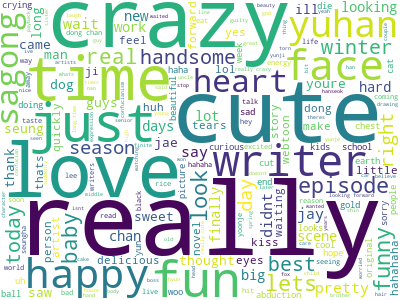

In [81]:
import nltk
import operator
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction import text 
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
%matplotlib inline
# %matplotlib qt

#nltk.download('stopwords')
#nltk.download('punkt')




local=os.getcwd()

example=pd.read_csv(local+'//csv//bomtoon_final.csv')
colname=list(example.keys())


# 추가할 영문 불용어 정의
additional_stop_words = ['ha', 'im','tt','going','oh','wow','know','ah','dont','think','come','want','like','good','did','hahahahahahahaha'
                        ,'hahahahahaha','ha']

# scikit-learn에서 제공하는 영어 불용어에 사용자 정의 불용어를 합침
stop_words = list(text.ENGLISH_STOP_WORDS.union(additional_stop_words))


example['0'].isna().sum()  # 전체 컬럼에 NaN 확인




cv = CountVectorizer(max_features=1000, stop_words = stop_words ,ngram_range=(1,2))  # 문장별로 단어 행렬 변환을 위해  말뭉치전체에 용어빈도를 위해 1000설정/ 중지단어를 위해 sklearn에서 제공하는 english 사용  띄어쓰기를 기본으로 토큰화를 진행하지만, 때로는 단어와 단어의 조합이 의미를 갖는 경우가 있다. 
tr_comment = cv.fit_transform(example[colname[1]].values.astype('U'))                # 학습을 위해 fit_transform 사용



words = cv.get_feature_names_out()                               # 결측치 무결성

doc = tr_comment[0].toarray()


count = tr_comment.sum(axis=0)
word_count = list(zip(words, count.flat))


word_order = sorted(
    word_count,
    key = operator.itemgetter(1), # 0이면 단어순, 1이면 빈도순
    reverse = True                # 내림차순(역순)으로 정렬한다.
)





wc = WordCloud(background_color='white', width=400, height=300)  # 워드클라우드 판 생성
cloud = wc.fit_words(dict(word_count))                           # 드라마 단어 데이터 학습

cloud.to_image() #  학습한 데이터 이미지 생성



#wc.to_file("wordcloud_example.png")

In [72]:
example


,Unnamed: 0,0
0,0,No I was surprised to avoid it in an unimagin...
1,1,No matter how much you think about it it may b...
2,2,Ha when I write a mini toast iPod case with eggs
3,3,Then the uncle is responsible for the lifetime
4,4,Im really sorry but I just want to be on the w...
...,...,...
59306,9991,Youre charged with a kiss
59307,9992,What is it in two days
59308,9993,Its a pity \r\nWhy am I sorry
59309,9994,I will really go crazy about that monopoly


In [ ]:
!pip install -U pyLDAvis

In [82]:
# LDA 시각화를 진행해봅시다.
import pyLDAvis
import pyLDAvis.lda_model
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(stop_words=stop_words, max_features= 1000, # 상위 1,000개의 단어를 보존
max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(example[colname[1]].values.astype('U'))

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
terms = vectorizer.get_feature_names_out()

lda_model = LatentDirichletAllocation(n_components=20, random_state=777)

scores = []
for i in range(2, 20):
    lda_model = LatentDirichletAllocation(n_components=i, random_state=1004)
    lda_model.fit(X)
    scores.append(lda_model.perplexity(X))

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

#get_topics(lda_model.components_,terms)

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(
                        lda_model = lda_model,
                       dtm = X,
                       vectorizer = vectorizer,
                       mds='tsne')
pyLDAvis.display(vis)


TF-IDF 행렬의 크기 : (59311, 1000)
